In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset
cell_df = pd.read_csv('cell_samples.csv')
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
# cambiar los valores de class a 0 y 1

cell_df['Class']=cell_df['Class'].replace([2],0) # Benigno
cell_df['Class']=cell_df['Class'].replace([4],1) # Maligno

cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


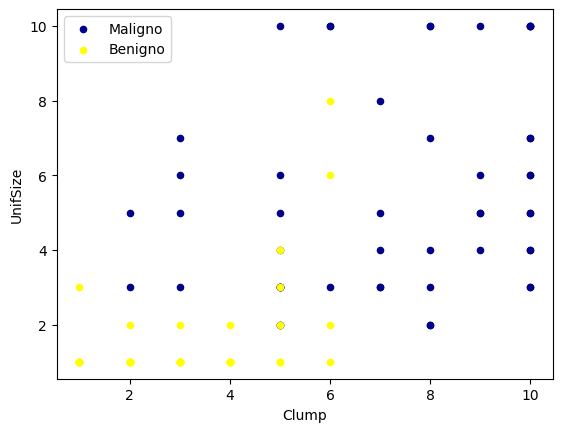

In [6]:
ax=cell_df[cell_df['Class']==1][0:50].plot(kind='scatter',x='Clump', y='UnifSize', color='DarkBlue', label='Maligno');
ax=cell_df[cell_df['Class']==0][0:50].plot(kind='scatter',x='Clump', y='UnifSize', color='Yellow', label='Benigno', ax=ax);
plt.show()


In [7]:
# Preprocesamiento de los datos y seleccion de las caracteristicas

cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [8]:
# eliminar las filas con valores no numericos

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc']= cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
# Retirar columna de ID

feature_df=cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x=np.asarray(feature_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [10]:
cell_df['Class']=cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y[0:5]

array([0, 0, 0, 0, 0])

In [12]:
# Creacion de grupos de entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print('Grupo de entrenamiento:', x_train.shape, y_train.shape)
print('Grupo de prueba:', x_test.shape, y_test.shape)

Grupo de entrenamiento: (546, 9) (546,)
Grupo de prueba: (137, 9) (137,)


## Modelación con SVM
Opcion Kernel (Transformaciones)

    1.- Linear
    2.- Polynomial
    3.- Radial Basis Function (RBF)
    4.- Sigmoid

In [13]:
# Modelado (SVM con Scikit-learn)

from sklearn import svm
clf = svm.SVC(kernel='rbf')
# se realiza un ajuste
clf.fit(x_train, y_train)



SVC()

In [14]:
# Prediccion para la base de prueba

yhat = clf.predict(x_test)
yhat[0:5]

array([0, 1, 0, 1, 0])

In [15]:
# matriz de confusion

from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)
cm=confusion_matrix(y_test, yhat)
cm

array([[85,  5],
       [ 0, 47]])

In [16]:
# se puede comprobar de manera visualcon las matrices de y_test y yhat
# y despues restarlas para ver los valores que no coinciden
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [17]:
yhat

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [19]:
z = y_test - yhat
z

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

Text(33.22222222222222, 0.5, 'Y Real')

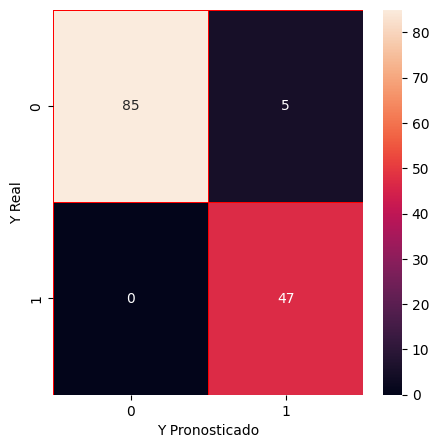

In [21]:
# Visualizacion de la matriz de confusion

f, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('Y Pronosticado')
plt.ylabel('Y Real')

### 85 pronosticos reales con 0 errores y 47 reales con 5 errores 

## Estadisticas de desempeño

In [22]:
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# Determinacion de niveles de Precision

La precisión = porcentaje de predicciones correctas relativas al total de predicciones
* el total se calcula por columna
* se contesta a la pregunta ¿Que porcentaje de las veces que hacemos un pronostico de cierto tipo es correcto?

In [23]:
PrecisionBenigno = cm[0,0]/(cm[0,0]+cm[1,0])
PrecisionBenigno

np.float64(1.0)

In [28]:
PrecisionMaligno = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision Maligno:', round(PrecisionMaligno,4))

Precision Maligno: 0.9038


# Niveles de Recuperación (Recall)
La Recuperacion = Porcentaje de predicciones correctas relativas al total de valores reales
* El total se calcula por Renglón
* ¿Que porcentaje de las veces que se tiene un valor es de identificarlo?

In [32]:
recallBenigno = cm[0,0]/(cm[0,0]+cm[0,1])
print('Recall Benigno:', round(recallBenigno,2))

Recall Benigno: 0.94


In [34]:
recallmaligo = cm[1,1]/(cm[1,0]+cm[1,1])
recallmaligo

np.float64(1.0)

# Determinacion Score-F1

F1 Score = es la media armónica ponderada de la precisión y de la recuperación, cuanto mas se acerque a 1 es mejor el modelo
* F1 Score se calcula 2*(Precision + Recall) / (Precision + Recall)

In [37]:
F1s_Benigno = 2*(PrecisionBenigno*recallBenigno)/(PrecisionBenigno+recallBenigno)
print('F1 Score:', round(F1s_Benigno,2))

F1 Score: 0.97


In [38]:
F1s_maligno = 2*(PrecisionMaligno*recallmaligo)/(PrecisionMaligno+recallmaligo)
print('F1 Score:', round(F1s_maligno,2))

F1 Score: 0.95


# Soportes

soporte = Número de observaciones que pertenecen en forma real a cada clase posible (Total por renglón)

In [39]:
SopBenigno = cm[0,0]+cm[0,1]
SopBenigno

np.int64(90)

In [40]:
SopMaligno = cm[1,0]+cm[1,1]
SopMaligno

np.int64(47)

## Determinacion de Precisión Global (Accuracy)

Accuracy= Porcentaje de predidciones correctas

In [41]:
Correctas = cm[0,0]+cm[1,1]
Incorrectas = cm[0,1]+cm[1,0]
Precisionglobal = Correctas/(Correctas+Incorrectas)
print('Precision Global:', round(Precisionglobal,2))

Precision Global: 0.96


## Promedios Simples por Indiccador (Macro Average)
Promedio simple por precisión, Recuperación y F1 score

In [42]:
MacAvePrecision = (PrecisionBenigno+PrecisionMaligno)/2
print('Precision Media:', round(MacAvePrecision,2))

Precision Media: 0.95


In [43]:
MacAveRecall = (recallBenigno+recallmaligo)/2
print('Recall Media:', round(MacAveRecall,2))

Recall Media: 0.97


In [44]:
MacAveF1 = (F1s_Benigno+F1s_maligno)/2
print('F1 Score:', round(MacAveF1,2))

F1 Score: 0.96


## Determinacion de Promedios ponderados por Indicador (Weighted Average)
promedios ponderados de acuerdo por soportes de indicador

In [45]:
PesoBenigno= SopBenigno/(SopBenigno+SopMaligno)
print('Peso Benigno:', round(PesoBenigno,2))
PesoMaligno= SopMaligno/(SopBenigno+SopMaligno)
print('Peso Maligno:', round(PesoMaligno,2))

Peso Benigno: 0.66
Peso Maligno: 0.34


In [46]:
WavePrecision = PesoBenigno*PrecisionBenigno+PesoMaligno*PrecisionMaligno
print('Wave Precision:', round(WavePrecision,2))

Wave Precision: 0.97


In [48]:
WaveRecall = PesoBenigno*recallBenigno+PesoMaligno*recallmaligo
print('Wave Recall:', round(WaveRecall,2))

Wave Recall: 0.96


In [49]:
Wavef1 = PesoBenigno*F1s_Benigno+PesoMaligno*F1s_maligno
print('Wave F1 Score:', round(Wavef1,2))

Wave F1 Score: 0.96


## Prueba de SVM con Kernel Lineal

In [52]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

yhat = clf.predict(x_test)

# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test, yhat)
cm

array([[85,  5],
       [ 0, 47]])

In [53]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



## Prueba de SVM con Kernel Polinomial

In [54]:
clf = svm.SVC(kernel='poly')
clf.fit(x_train, y_train)

yhat = clf.predict(x_test)

# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test, yhat)
cm

array([[86,  4],
       [ 0, 47]])

In [55]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        90
           1       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



## Prueba con kernel sigmoid

In [57]:
clf = svm.SVC(kernel='sigmoid')
clf.fit(x_train, y_train)

yhat = clf.predict(x_test)

# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test, yhat)
cm

array([[54, 36],
       [47,  0]])

In [58]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.53      0.60      0.57        90
           1       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

